# Read geotiff file

In [1]:
import geotiff as gt
import numpy as np
import os

notebook_path = os.getcwd()
if not notebook_path.endswith('notebooks'):
  notebook_path = os.path.join(notebook_path, 'notebooks')
    
# Read the shapefile
raster_file = os.path.join(notebook_path, 'assets', 'rasterfiles', 'recharge.tif')
geotiff = gt.GeoTiff(raster_file, as_crs=4326)

## Get the metadata

In [2]:
# Shape of the geotiff
geotiff.tif_shape

[225, 463]

In [3]:
geotiff.get_int_box(bBox=((32.9, 34.62), (33.0, 34.65)))

((62, 97), (432, 207))

In [4]:
# Bounding box of the geotiff
geotiff.tif_bBox

((32.88334, 34.6761), (33.00835, 34.61535))

In [5]:
geotiff.get_coord_arrays()
geotiff.tif_shape

[225, 463]

In [6]:
len(geotiff.get_coord_arrays()[0][0])

463

In [7]:
coord_arrays = geotiff.get_coord_arrays(bBox=((32.9, 34.62), (33.0, 34.65)))
x_coord_array = coord_arrays[0]
y_coord_array = coord_arrays[1]
x_coords = x_coord_array[0]
y_coords = y_coord_array[:, 0]

y_coords, y_coords

(array([34.64991, 34.64964, 34.64937, 34.6491 , 34.64883, 34.64856,
        34.64829, 34.64802, 34.64775, 34.64748, 34.64721, 34.64694,
        34.64667, 34.6464 , 34.64613, 34.64586, 34.64559, 34.64532,
        34.64505, 34.64478, 34.64451, 34.64424, 34.64397, 34.6437 ,
        34.64343, 34.64316, 34.64289, 34.64262, 34.64235, 34.64208,
        34.64181, 34.64154, 34.64127, 34.641  , 34.64073, 34.64046,
        34.64019, 34.63992, 34.63965, 34.63938, 34.63911, 34.63884,
        34.63857, 34.6383 , 34.63803, 34.63776, 34.63749, 34.63722,
        34.63695, 34.63668, 34.63641, 34.63614, 34.63587, 34.6356 ,
        34.63533, 34.63506, 34.63479, 34.63452, 34.63425, 34.63398,
        34.63371, 34.63344, 34.63317, 34.6329 , 34.63263, 34.63236,
        34.63209, 34.63182, 34.63155, 34.63128, 34.63101, 34.63074,
        34.63047, 34.6302 , 34.62993, 34.62966, 34.62939, 34.62912,
        34.62885, 34.62858, 34.62831, 34.62804, 34.62777, 34.6275 ,
        34.62723, 34.62696, 34.62669, 34.62642, 

In [8]:
geotiff.get_coords(1, 1)

(32.88361, 34.67583)

## Read date into a zarr array
https://zarr.readthedocs.io/en/stable/index.html

In [9]:
data = geotiff.read()
data

<zarr.core.Array (225, 463) float64 read-only>

In [10]:
data.info

Type,zarr.core.Array
Data type,float64
Shape,"(225, 463)"
Chunk shape,"(2, 463)"
Order,C
Read-only,True
Compressor,None
Store type,zarr.storage.KVStore
No. bytes,833400 (813.9K)
No. bytes stored,212
Storage ratio,3931.1


In [11]:
np_data = np.array(data)
np_data

array([[-3.40282347e+38, -3.40282347e+38, -3.40282347e+38, ...,
        -3.40282347e+38, -3.40282347e+38, -3.40282347e+38],
       [-3.40282347e+38, -3.40282347e+38, -3.40282347e+38, ...,
        -3.40282347e+38, -3.40282347e+38, -3.40282347e+38],
       [-3.40282347e+38, -3.40282347e+38, -3.40282347e+38, ...,
        -3.40282347e+38, -3.40282347e+38, -3.40282347e+38],
       ...,
       [-3.40282347e+38, -3.40282347e+38, -3.40282347e+38, ...,
        -3.40282347e+38, -3.40282347e+38, -3.40282347e+38],
       [-3.40282347e+38, -3.40282347e+38, -3.40282347e+38, ...,
        -3.40282347e+38, -3.40282347e+38, -3.40282347e+38],
       [-3.40282347e+38, -3.40282347e+38, -3.40282347e+38, ...,
        -3.40282347e+38, -3.40282347e+38, -3.40282347e+38]])

In [12]:
np_data[np_data < 0] = np.nan
np_data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [13]:
np_data.max()

nan

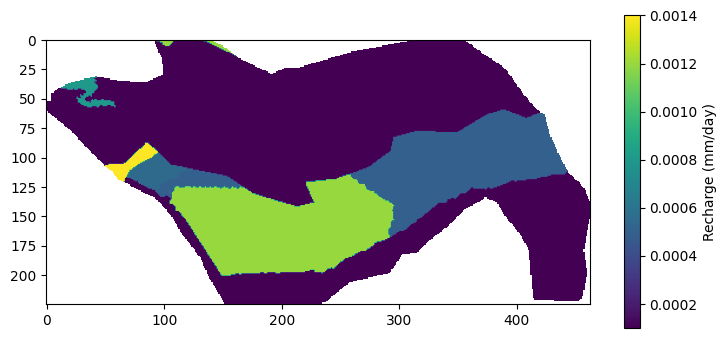

In [14]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

im = plt.imshow(np_data, cmap='viridis')
cbar = plt.colorbar(im)
cbar.set_label("Recharge (mm/day)")
plt.show()